# <font color="blue"> Instructions on using Colab </font>

1. You do not have permission to edit this original file. To start editing and save your changes, make a copy of the notebook and save it on your google drive (File-> Save a copy in Drive)(only one person in your group needs to do it). Then you can share this copy with your other teammates.
2. Everyone in your team can edit this notebook. You can view revision history under File -> Revision history. (Note, however, that the revision histroy will be deleted at some point unless you "pin" the revision: File -> save and pin revision.)
3. Please see the end of this notebook for submission instructions.

# Final Project (due Tue, June 10, 2025)

The final group project has two parts

- Part I is more similar to the HW projects, while
- Part II requires some more independence. It involves learning and comprehending a method from a paper, and to then implement it.

In contrast to the homework project, you are **not supposed to talk to anyone about the project outside of your group**. If you need help or advise, please contact us.

Any violation of these rules, and more generally, any suspected academic misconduct will be reported to Office of Student Support and Student Judicial Affairs.

Also be reminded about the [UC Davis code of academic conduct](https://ossja.ucdavis.edu/code-academic-conduct).


### List all the group members here

- 1
  - Student ID: 916577012
  - Student Name: Charles Zhang

- 2
  - Student ID: 921181095
  - Student Name: Vivian Wong

- 3
  - Student ID: 919523380
  - Student Name: Zi Zeng


- briefly describe the contribution of the individual group members here:

Charles Zhang - Implementation of Gap Method and KMeans Class for Part 2

Vivian Wong - Changed some code in Part 1.3 so the graph displays 25 unique points on the graph, wrote all the responses in Part 1 and 2 of the responses in Part 2.

Zi Zeng - Implemented part 1, wrote 2 of the responses in part 2 

In [2]:
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
from keras.datasets import mnist # pip install keras, pip install tensorflow

## Load the digit image data MNIST

Each image is a digit with image size $28\times 28$

In [3]:
(train_X, train_y) = mnist.load_data()[0]

Because the original data set is very large, we only use a subset of the data set here.

In [4]:
digits_data = train_X[:5000].reshape(5000, -1)
digits_target = train_y[:5000]
digits_data.shape, digits_target.shape

((5000, 784), (5000,))

## Part I: Visualize the Principal Components

### (1) Pick you favorite digit from 0-9. In part I, we will only look at images of your selected digit.

In [5]:
# specify your favorite number
num = 4 
X = digits_data[digits_target == num]
print(X.shape)

(535, 784)


Let's show the mean image of your selected digit
$\bar{X} = \sum_{i=1}^n X^{(i)}$

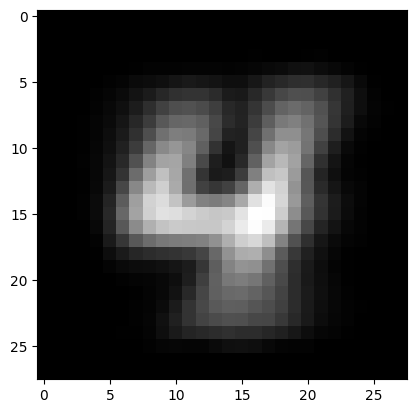

In [6]:
X_bar = X.mean(axis=0)
plt.imshow(X_bar.reshape((28, 28)), cmap='gray')
plt.show()

### (2) Visualize the 1st and 2nd principal component of your digit.
Visualize $w_1$ and $w_2$. They are both in $\mathbb{R}^{784}$ and can be visualized as images.

They are the two top eigenvectors corresponding to the largest and second largest eigenvalues of the covariance matrix. Equivalently, they are right singular vectors corresponding to the largest and second largest singular value of the **centered** data.

Therefore, you can use SVD or eigenvalue decomposition, or use the `PCA` method in `scikit-learn`.

In [7]:
def show_principal_components(k = 2):
    # calculate the first kth principal components, defined as W: np.ndarray
    # the ith of column of W is the ith principal component
    ##### your code starts here #####

    #center
    X_centered = X - X_bar
    
    # SVD
    U, s, Vt = np.linalg.svd(X_centered.T, full_matrices=False)
    W = U[:, :k]
    
    ##### your code ends here #####

    fig, ax = plt.subplots(1, k + 1)
    ax[0].imshow(X_bar.reshape((28, 28)), cmap="gray")
    ax[0].set_title("mean")
    ax[0].axis("off")
    for i in range(k):
        ax[i+1].imshow(W[:, i].reshape((28, 28)), cmap="gray")
        ax[i+1].set_title(f"{i+1}th PC")
        ax[i+1].axis("off")
    plt.show(fig)

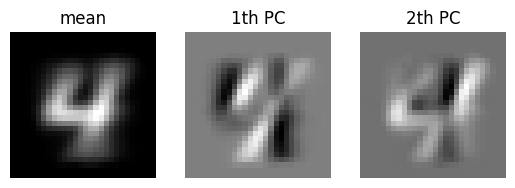

In [8]:
show_principal_components(k=2)

In [9]:
interact(show_principal_components)

interactive(children=(IntSlider(value=2, description='k', max=6, min=-2), Output()), _dom_classes=('widget-int…

<function __main__.show_principal_components(k=2)>

### (3) Visualize the projection scores

Make a 2D scatter plot of the first two principal components (the projection scores) $Z_1$, $Z_2 \in \mathbb{R}^n$, where $n$ is the number of data points in the data matrix $X$. Put the first PC score $Z_1$ on the $x$-axis.

Make a $5 \times 5$ "uniform" grid based on the marginal quantile of the scores. That is, the grid is spanned by

- ($\min(Z_1)$, 25th quantile of $Z_1$, median($Z_1$), 75th quantile of $Z_1$, $\max(Z_1)$)
  
and

- ($\min(Z_2)$, 25th quantile of $Z_2$, median($Z_2$), 75th quantile of $Z_2$, $\max(Z_2)$)

There are 25 points forming the grid. For each point, mark the data point **closest to that point**. So you will have 25 marked data points.

Hint: use `np.quantile` and `np.meshgrid`

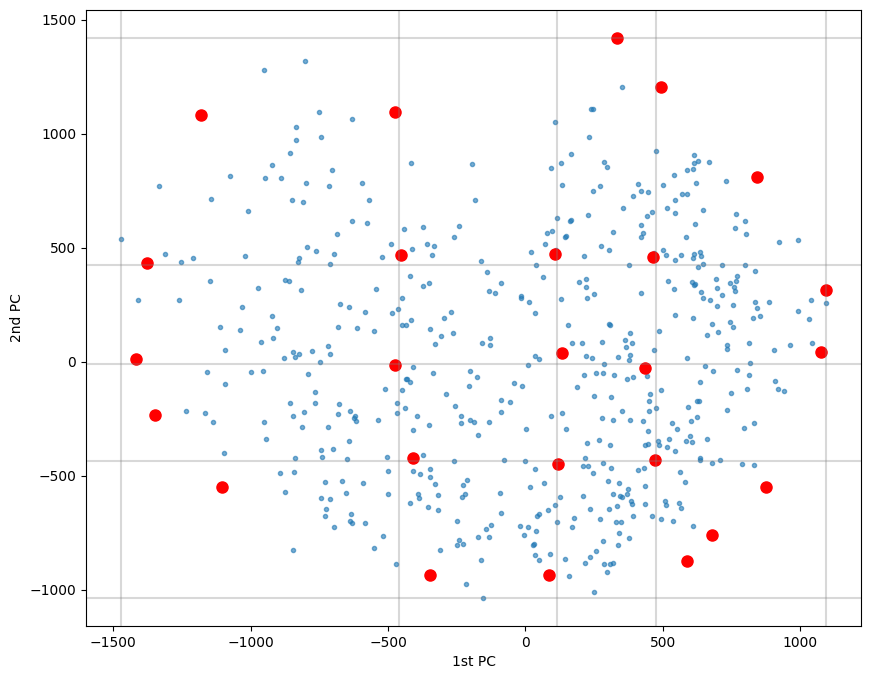

In [10]:
##### your code starts here #####

# calc proj scores
pca = PCA(n_components=2)
Z = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.plot(Z[:, 0], Z[:, 1], '.', alpha=0.6)

X_grid = np.quantile(Z[:, 0], [0, 0.25, 0.5, 0.75, 1])
Y_grid = np.quantile(Z[:, 1], [0, 0.25, 0.5, 0.75, 1])
xv, yv = np.meshgrid(X_grid, Y_grid)
# Got from: https://stackoverflow.com/a/13730506 on how to turn a 5x5 into 1D
# Column_stack turns them into 25x2 with the x & y coord paired
gridPts = np.column_stack([xv.flatten(), yv.flatten()])

# finding closest data points
marked_indices = []
marked_points = []
# Makes sure all values in this list is unique
# Referenced https://stackoverflow.com/a/12897477 to get the unique indices/pts.
used = set()

for pt in gridPts:
    # Euclidean distance from grid point to each point
    distance = np.linalg.norm(Z-pt, axis = 1)
    # Instead of getting the smallest value in distance, want to sort from smallest to largest
    # Will use this to prevent repeat values
    closest_idx = np.argsort(distance)

    # Looping through the closest_idx to find the unique points closest to each gridpoint
    # For the 4s, there is one point that is included twice, so the graph displays 24/25 points visually
    # This chooses the next point that is closes to the gridpoint and makes sure 25 pts show up on the graph
    for i in closest_idx:
        if i not in used:
            used.add(i)
            marked_indices.append(i)
            marked_points.append([Z[i, 0], Z[i, 1]])
            break

#some plotting of marked points
marked_points = np.array(marked_points)
plt.plot(marked_points[:, 0], marked_points[:, 1], 'ro', markersize=8, label='Marked points')

# grid lines
for x in X_grid:
    plt.axvline(x, color='gray', alpha=0.3)
for y in Y_grid:
    plt.axhline(y, color='gray', alpha=0.3)

##### your code ends here #####
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

Next make a figure with 5 $\times$ 5 subplots, each one displays the original image corresponding to the marked data point in the previous plot.

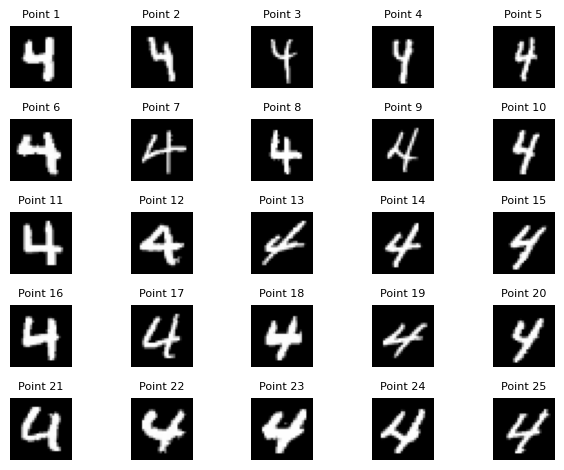

In [11]:
fig, ax = plt.subplots(5, 5)

##### your code starts here #####
while len(marked_indices) < 25:
    marked_indices.append(marked_indices[-1])

for i in range(5):
    for j in range(5):
        idx = i * 5 + j
        if idx < len(marked_indices):
            img = X[marked_indices[idx]].reshape((28, 28))
            ax[i, j].imshow(img, cmap='gray')
            ax[i, j].axis('off')
            ax[i, j].set_title(f'Point {idx+1}', fontsize=8)
        else:
            ax[i, j].axis('off')
plt.tight_layout()

##### your code ends here #####

plt.show(fig)

Do you see any pattern here? Can you explain it with the principal components you displayed in (3)?

For each row, the downward line for the 4 seems to move from being slanted slightly to the right to being left slanted.

The first principal component relates to how slanted the 4 is. As the 1st principal component score increases, the more slanted left the 4 is. A distinct pattern is clearly visible, revealing how the principal components have systematically organized the different ways the digit 4 is written. The first PC corresponds directly to the slant or rotation of the digit.

The second principal component, on the vertical axis, corresponds to the vertical position of the horizontal crossbar. Images with high PC2 scores, located at the top of the plot (like 1-5), consistently feature a high crossbar, giving the digit a more "open" top. Conversely, images with low PC2 scores, found at the bottom of the plot (like 21-25), all have a low crossbar, making the top triangle of the 4 smaller and more compact.


### (4) How does the singular value of $X$ change with $k$?
First, make a plot of the singular values against $k$. Name the x-axis as "k", and the y-axis as "singular value".

Text(0, 0.5, 'singular value')

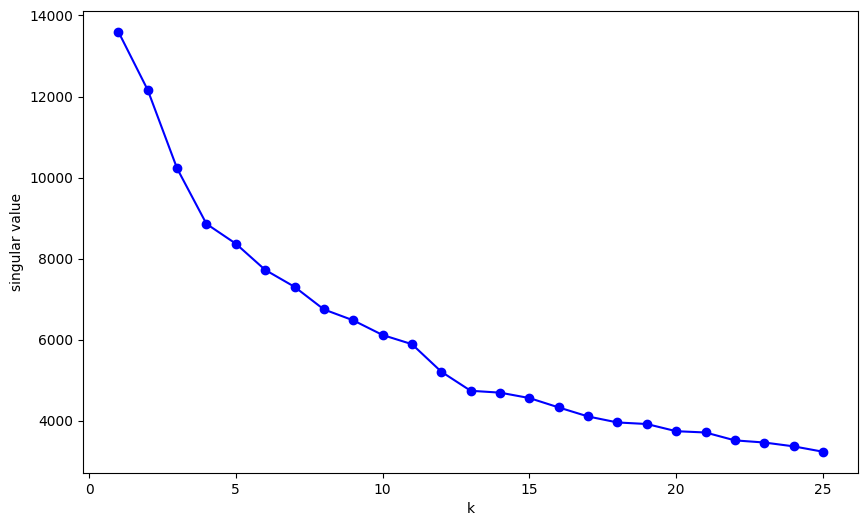

In [12]:
##### your code starts here #####
X_centered = X - X_bar
U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)
k_values = range(1, min(25, len(s)) + 1)
plt.figure(figsize=(10, 6))
plt.plot(k_values, s[:len(k_values)], 'b-o', label='Original data')
plt.xlabel("k")
plt.ylabel("singular value")

##### your code ends here #####

You should see some type of an elbow shape, meaning a few of the largest principal components already explain a large proportion of variance in the image.

For comparison, let's now add another curve. For each image in $X$, randomly shuffle the entries. The image should look like random noise after the shuffling.

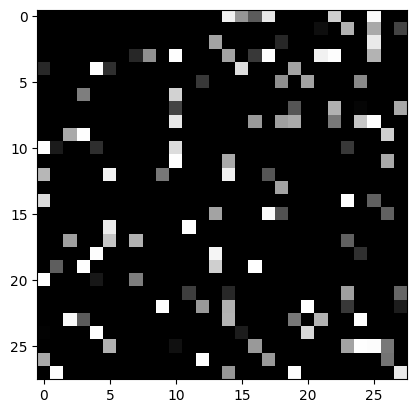

In [13]:
X_shuffle = X.copy()
##### your code starts here #####

for i in range(X_shuffle.shape[0]):
    np.random.shuffle(X_shuffle[i])

##### your code ends here #####
plt.imshow(X_shuffle[0].reshape((28, 28)), cmap="gray")
plt.show()

Then add another "singular value vs k" curve for `X_shuffle`, with different color. Add a label for each curve.

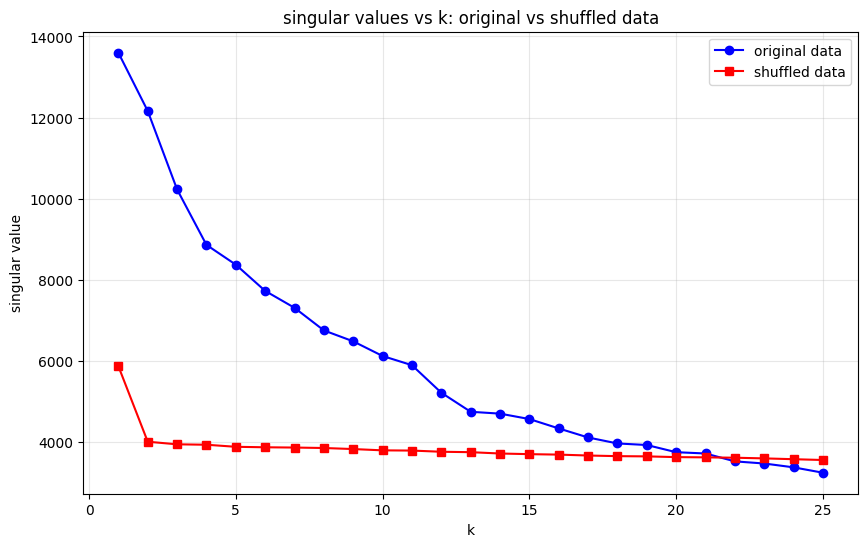

In [14]:
##### your code starts here #####

#svd calc
X_shuffle_centered = X_shuffle - X_shuffle.mean(axis=0)
U_shuffle, s_shuffle, Vt_shuffle = np.linalg.svd(X_shuffle_centered, full_matrices=False)

plt.figure(figsize=(10, 6))
plt.plot(k_values, s[:len(k_values)], 'b-o', label='original data')
plt.plot(k_values, s_shuffle[:len(k_values)], 'r-s', label='shuffled data')
plt.xlabel("k")
plt.ylabel("singular value")
plt.title("singular values vs k: original vs shuffled data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##### your code ends here #####

Discuss what you see:

For the shuffled data, it seems that the elbow point is at k=2. It's very clear that k=2 is where the singular value stops decreasing as dramatically. For the original data, it is more ambiguious as to where the elbow point may be as the line looks more smooth compared to the shuffled data. It could be at k=4 or k=13.

### (5) Kernel Density Estimation -- tuning the `bandwidth`

We now apply PCA to the entire data set with $ k = 50$. `Z` is now the projection scores with shape (n, 50)

- Compute the kernel density estimator using `sklearn.neighbors.KernelDensity`. Here, let's simply use the Gaussian kernel and the Euclidean distance, and explore the effect of the `bandwidth` parameter. Discover the difference between using two different bandwidths, 0.1 and 200.

- Draw 16 new sample points from each fitted density using `KernelDensity.sample` (for comparison purpose, please use the same value for `random_state` for both bandwidths). Of course, these samples are in the space of projection scores. Use `pca.inverse_transform` to reconstruct digit images from these samples. Compare the sample digits drawn from density fitted with large bandwidth and small bandwidth. What are the differences? Could you give some intuitive explanations why you are seeing overlapping digits when `bandwidth` is large?

In [15]:
from sklearn.neighbors import KernelDensity

k = 50
pca = PCA(n_components=k)
Z = pca.fit_transform(digits_data)

def sample_digits(bandwidth: float = 1.0, n_samples:int = 16) -> np.ndarray:
    ##### your code starts here #####

    # fit kde
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(Z)
    
    #get samples
    Z_samples = kde.sample(n_samples, random_state=42)
    
    #make digits
    new_digits = pca.inverse_transform(Z_samples)
    
    # fix range
    new_digits = np.clip(new_digits, 0, 255)

    ##### your code ends here #####
    return new_digits # its shape should be (n_samples, 784)

new_digits_1 = sample_digits(bandwidth=0.1, n_samples=16).reshape((4, 4, -1))
new_digits_2 = sample_digits(bandwidth=200, n_samples=16).reshape((4, 4, -1))

In [16]:
def show_digits(new_digits: np.ndarray):
    '''
    new_digits have shape (4, 4, 784)
    '''
    fig, ax = plt.subplots(4, 4, subplot_kw=dict(xticks=[], yticks=[]))

    ##### your code starts here #####

    for i in range(4):
        for j in range(4):
            digit = new_digits[i, j].reshape((28, 28))
            ax[i, j].imshow(digit, cmap='gray')
            ax[i, j].axis('off')
    
    ##### your code ends here #####

    plt.show(fig)

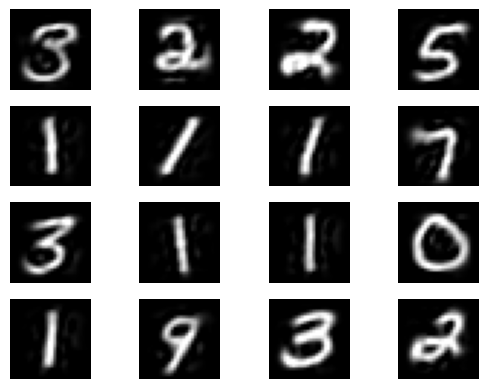

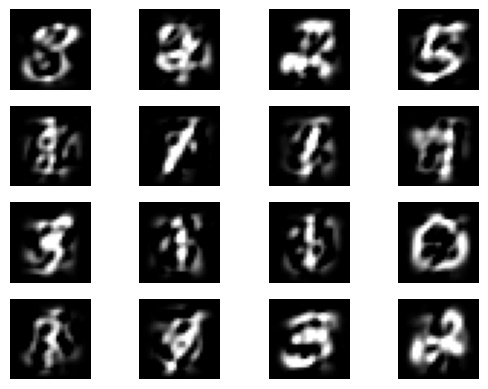

In [17]:
show_digits(new_digits_1)
show_digits(new_digits_2)

You can clearly see what each digit is using the 0.1 bandwidth. For the 200 bandwidth, the numbers are more muddled and you can't clearly tell what digits they are. The lines are also not as smooth and some of the digits look like a mix of two different digits.
Using the analogy where the bandwidth is like the binwidth for histograms, the larger bandwidth probably included unrelated points in the cluster that might have belonged to another digit's cluster. This inclusion is making the digit seemed really muddled or like a combination of multiple digits when graphed/displayed. At a smaller bandwidth, enough points were included in the cluster correctly to display the right digit but nothing more that might make it muddled.

Use `sklearn.model_selection.GridSearchCV` to select the best bandwidth. Refit the model with the selected bandwidth, then draw another sample of 16 digits using that density. You can search for bandwidth within the choices `np.logspace(-1, 3, 20)`.

`GridSearchCV` (by default) uses the estimator's `score` method to evaluation performance on the test folds. In the case of `KernelDensity`, `score()` gives the log-likelihood of the test data in the estimated density. (Here it is the likelihood under the Gaussian mixture model (GMM))

best bandwidth selected by cv: 88.5867


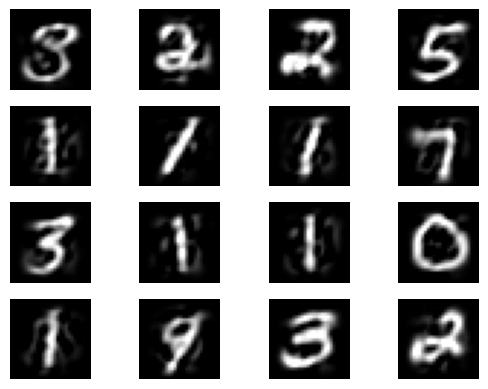

In [18]:
from sklearn.model_selection import GridSearchCV

##### your code starts here #####
#bandwidth num create
bandwidths = np.logspace(-1, 3, 20)
param_grid = {'bandwidth': bandwidths}

kde = KernelDensity(kernel='gaussian')

grid_search = GridSearchCV(kde, param_grid, cv=5, n_jobs=-1)
grid_search.fit(Z)

# get good bandwidth number
cv_selected_bandwidth = grid_search.best_params_['bandwidth']
print(f"best bandwidth selected by cv: {cv_selected_bandwidth:.4f}")

##### your code ends here #####

new_digits_cv = sample_digits(bandwidth=cv_selected_bandwidth, n_samples=16).reshape((4, 4, -1))
show_digits(new_digits_cv)

Note that your CV-selected bandwidth, which maximizes the likelihood on the test folds, does not necessarily look better than the previous choices. Could you (intuitively) explain why?

The CV-selected bandwidth might be better statistically, but not visually. It's trying to find the bandwidth that maximizes the likelihood on tests folds so it could perform better on unseen data as well. Cross validation is trying to find the best bandwidth that generalizes any digit dataset. If the digits looked as good as the ones with 0.1 bandwidth, it would be overfitting and would not perform as well on new data. Overfitting would only allow the bandwidth to perform well on this set of digits and not another.

## Part II: Select the number of clusters using the *Gap statistic* ([Tibshirani et al., 2001b](hastie.su.domains/Papers/gap.pdf)).

This paper provides a statistical procedure to formalize the heuristic of the "elbow method", by looking at the gap between the change in within-cluster dispersion and its "expected" version.

The algorithm is described in detail in section 4 in the paper.

$$ \widehat{k} = \arg \min_k \{k\vert \mathrm{Gap}(k) \ge \mathrm{Gap}(k + 1) - s_{k+1}\}$$

### (a) Implement the algorithm.

Note the following:
- Your algorithm should take a general `X: np.ndarray` as input, with shape $(n, p)$.

- There are two choices of reference distribution mentioned in Section 4. You need to implement both of them. For example, in your function you can specify a parameter called `need_PCA`, if `need_PCA==True`, draw $B$ samples from the reference distribution (a). Otherwise, draw $B$ samples from the reference distribution (b). (By default, set $B = 50$.)

- For efficiency, you can specify an upper limit for $k$. Namely, only calculate Gap($k$) for $ 1 \le k \le$ `kmax`. If none of the considered $k$ satisfy $ \mathrm{Gap}(k) \ge \mathrm{Gap}(k + 1) - s_{k+1}$, then output a result that represents $k>$ `kmax` - 1, such as `np.inf` or `None`.

- Besides the selected $k$, you should also be able to output plots like in Fig. 2 of the [paper](hastie.su.domains/Papers/gap.pdf). Our data `X` in general has $p \ge 2$. Instead of the scatter plot (a) in Fig. 2, make a plot of $\textrm{Gap}(k) - \textrm{Gap}(k + 1) + s_{k+1}$ against $k$, so that $\hat{k}$ will be the smallest $k$ that gives a positive value of that curve. (You can add an horizontal dashed line at $y=0$)

Some suggestions for making the plots:
- Introduce a parameter named `need_plot` to control whether to make the plots, or simply output the selected $\hat{k}$.
- Use `plt.subplots((2,2))`. If you want to adjust the overall figure size, you can set e.g. `figsize=(10, 10)` in `subplot()`
- To show the error bars like in Fig 2 (d), you can use `plt.errorbar`.
- Specify what is your $x$-axis and what is your $y$-axis for each subplot. Make a title if necessary.

In [19]:
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from typing import List
# This is an example of what your algorithm can look like.
# Of course you can define other helper functions, or even rewrite this function entirely from scratch,
# as long as you can output the selected k, and you can (optionally) output the plots.
os.environ['OMP_NUM_THREADS'] = '3'

class k_means:
    
    def __init__(self, data: np.ndarray, d: int, k: int , tol: float, max_iter: int, seed: int = 20):
        """
        data: data to cluster
        d:dimension of the data
        k: prespecified number of clusters
        tol: convergence criterion
        max_iter: maximum number of iterations allowed
        """
        self.partitions = {i: [] for i in range(k)}
        self.centers = np.zeros((k, d))
        self.next_centers = np.zeros((k, d))
        self.labels = np.array([])
        self.d = d
        self.n = data.shape[0]
        self.counter = 0
        self.seed = seed
        self.data = data
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    
    def initialize_centers(self, method: int):
        """
        method = 0: pick the first k points from the data as centers
        method = 1: randomly pick k points from the data as centers
        """
        if method == 0:
            self.centers = self.data[:self.k, :]
    
        elif method == 1:
            np.random.seed(self.seed)
            indices = np.random.choice(self.n, self.k, replace=False)
            self.centers = self.data[indices]
        

    def search(self):
        """
        Vectorized update of partitions and centers.
        """
        # Calculate squared distances between all points and all centers in a vectorized way
        # (a-b)^2 = a^2 - 2ab + b^2
        data_sq_norms = np.sum(self.data**2, axis=1, keepdims=True)
        centers_sq_norms = np.sum(self.centers**2, axis=1)
        dot_products = self.data @ self.centers.T
        
        dist_sq = data_sq_norms - 2 * dot_products + centers_sq_norms
        
        self.labels = np.argmin(dist_sq, axis=1)
        
        new_centers_list = []
        self.partitions = {i: [] for i in range(self.k)}
        for i in range(self.k):
            points_in_cluster = self.data[self.labels == i]
            if len(points_in_cluster) > 0:
                new_centers_list.append(np.mean(points_in_cluster, axis=0))
                self.partitions[i] = np.where(self.labels == i)[0].tolist()
            else:
                new_centers_list.append(self.centers[i])
        
        self.next_centers = np.array(new_centers_list)
            
            
    def is_updated(self):
        """
        return True if update is completed, meaning that the algorithm has not yet converged; 
        return False otherwise;
        """
        difference = np.sum(np.abs(self.centers - self.next_centers))
        if difference < self.tol:
            return False
        else:
            self.centers = np.copy(self.next_centers)
            return True

        
    def fit_model(self, silent: bool = False):
        """
        function to fit the k-means algorithms using the above functions
        """
        self.initialize_centers(1)
        self.counter = 0
        
        while self.counter < self.max_iter:
            self.search()
            if not self.is_updated():
                if not silent:
                    print(f"Convergence Reached! Number of Iterations: {self.counter + 1}")
                break
            self.counter += 1
        else:
            if not silent:
                print("Maximum Number of Iteration Reached!")
    
        self.get_labels()

        
    def set_k(self, k: int):
        self.k = k
        
    def predict(self, pt: np.ndarray):
        distances = [np.linalg.norm(pt-c) for c in self.centers]
        cluster_label = distances.index(min(distances))
        return cluster_label

    
    def get_labels(self):
        return self.labels
    
    def get_centers(self):
        return self.centers
    
    def get_clusters(self):
        return self.partitions

    def get_cost(self):
        """
        Here we use within cluster sum of squares as cost 
        """
        cost = 0
        if self.labels.size == 0:
            self.fit_model(silent=True)

        for cluster_index, point_indices in self.partitions.items():
            if point_indices:
                cluster_points = self.data[point_indices]
                center = self.centers[cluster_index]
                cost += np.sum((cluster_points - center)**2)
        return cost

def select_k_by_Gap_statistic(X: np.ndarray, kmax: int = 20, B: int = 50, need_PCA: bool = False, need_plot: bool =True) -> int:
    '''
    returns the number of clusters k selected by the Gap statistic. If the selected k is larger than kmax, return None.
    X has shape (n, p); n is the sample size; p is the number of features.
    kmax is maximum k whose Gap(k) will be computed
    B is the number of copies from the reference distribution
    need_PCA means whether to use the reference distribution (1) or (2)
    if need_plot = True, make the required plots. You can use plt.subplots().
    It is recommended to set a seed for generating the reference distributions,
    so that you can always reproduce the same results.
    '''
    ##### your code starts here #####
    np.random.seed(42)
    n, p = X.shape

    if need_PCA:
        n_components = min(n, p)
        pca = PCA(n_components=n_components).fit(X)
        X_pca = pca.transform(X)
        min_pca, max_pca = X_pca.min(axis=0), X_pca.max(axis=0)
    else:
        min_X, max_X = X.min(axis=0), X.max(axis=0)

    Wk_vals = np.zeros(kmax)
    log_Wk_vals = np.zeros(kmax)
    E_log_Wk_vals = np.zeros(kmax)
    sdk_vals = np.zeros(kmax)
    
    if kmax > n:
        print(f"Warning: kmax ({kmax}) is larger than the number of samples ({n}). Adjusting kmax to {n}.")
        kmax = n

    for k_idx, k in enumerate(range(1, kmax + 1)):
        km = k_means(data=X, d=p, k=k, tol=1e-4, max_iter=100)
        km.fit_model(silent=True)
        Wk = km.get_cost()
        Wk_vals[k_idx] = Wk
        log_Wk_vals[k_idx] = -np.inf if Wk == 0 else np.log(Wk)

        log_Wk_ref_vals = np.zeros(B)
        for b in range(B):
            if need_PCA:
                ref_pca = np.random.uniform(min_pca, max_pca, size=(n, n_components))
                X_star = pca.inverse_transform(ref_pca)
            else:
                X_star = np.random.uniform(min_X, max_X, size=(n, p))
            
            km_ref = k_means(data=X_star, d=p, k=k, tol=1e-4, max_iter=100, seed=42+b)
            km_ref.fit_model(silent=True)
            Wk_ref = km_ref.get_cost()
            log_Wk_ref_vals[b] = -np.inf if Wk_ref == 0 else np.log(Wk_ref)

        E_log_Wk_vals[k_idx] = np.mean(log_Wk_ref_vals)
        sdk_vals[k_idx] = np.std(log_Wk_ref_vals)

    gap_vals = E_log_Wk_vals - log_Wk_vals
    sk_vals = sdk_vals * np.sqrt(1 + 1/B)

    k_hat = None
    if kmax > 1:
        for k_idx in range(kmax - 1):
            if gap_vals[k_idx] >= gap_vals[k_idx + 1] - sk_vals[k_idx + 1]:
                k_hat = k_idx + 1
                break

    if k_hat is None and kmax > 0:
        print(f"No k from 1 to {kmax-1} satisfies the condition. The optimal k may be >= {kmax}.")

    if need_plot:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        k_range = np.arange(1, kmax + 1)
        
        # Top left: Decision plot
        if kmax > 1:
            selection_curve = gap_vals[:-1] - gap_vals[1:] + sk_vals[1:]
            k_range_sel = np.arange(1, kmax)
            axes[0, 0].plot(k_range_sel, selection_curve, 'o-')
            axes[0, 0].axhline(0, ls='--', color='k')
            if k_hat is not None:
                axes[0, 0].axvline(k_hat, ls='--', color='r', label=f'Optimal k = {k_hat}')
            axes[0, 0].legend()
            axes[0, 0].set_xticks(k_range_sel)
        axes[0, 0].set_xlabel('Number of clusters k')
        axes[0, 0].set_ylabel('Gap(k) - (Gap(k+1) - s_{k+1})')
        axes[0, 0].set_title('Gap Statistic Selection Curve')
        axes[0, 0].grid(True)
        
        # Top right: log(WCSS) vs Number of Clusters
        axes[0, 1].plot(k_range, log_Wk_vals, 'o-', label='log(WCSS)')
        axes[0, 1].plot(k_range, E_log_Wk_vals, 'o-', label='E*[log(WCSS)]')
        axes[0, 1].set_xlabel('Number of Clusters')
        axes[0, 1].set_ylabel('log(WCSS)')
        axes[0, 1].set_title('log(WCSS) vs Number of Clusters')
        axes[0, 1].legend()
        axes[0, 1].grid(True)
        axes[0, 1].set_xticks(k_range)

        # Bottom left: Gap(k) vs k with error bars
        axes[1, 0].errorbar(k_range, gap_vals, yerr=sk_vals, fmt='o-', capsize=3)
        axes[1, 0].set_xlabel('k')
        axes[1, 0].set_ylabel('Gap(k)')
        axes[1, 0].set_title('Gap(k) with Error Bars vs. k')
        if k_hat is not None:
            axes[1, 0].axvline(k_hat, ls='--', color='r', label=f'Optimal k = {k_hat}')
        axes[1, 0].legend()
        axes[1, 0].grid(True)
        axes[1, 0].set_xticks(k_range)
        
        # Bottom right: SS Wk vs k Plot
        axes[1, 1].plot(k_range, Wk_vals, 'o-')
        axes[1, 1].set_xlabel('number of clusters k')
        axes[1, 1].set_ylabel('within sum of squares Wk')
        axes[1, 1].set_title('Within SS Wk vs k')
        axes[1, 1].grid(True)
        axes[1, 1].set_xticks(k_range)
        
        fig.suptitle(f'Gap Statistic Analysis (B={B}, PCA={"Yes" if need_PCA else "No"})', fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    return k_hat

### (b) Apply the algorithm to the data containing only your favourite digit.

Use the original data as input. Then apply the algorithm, using two different reference distributions, respectively.

Following is some example code. Feel free to modify it.

In [20]:
X = digits_data[digits_target == num]
B = 100
print(X.shape)

(535, 784)


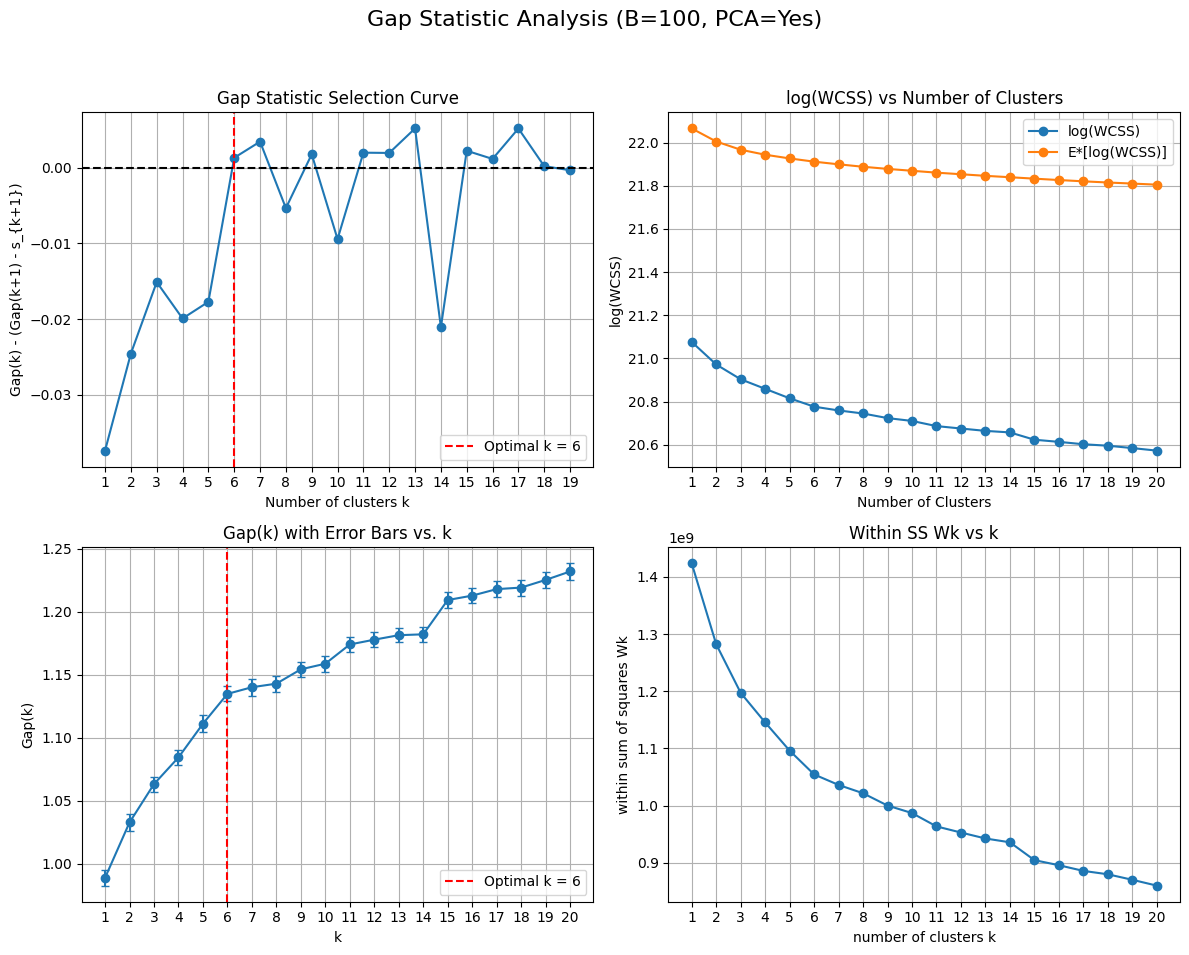

6

In [21]:
select_k_by_Gap_statistic(X, kmax=20, B=B, need_PCA=True, need_plot=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No k from 1 to 19 satisfies the condition. The optimal k may be >= 20.


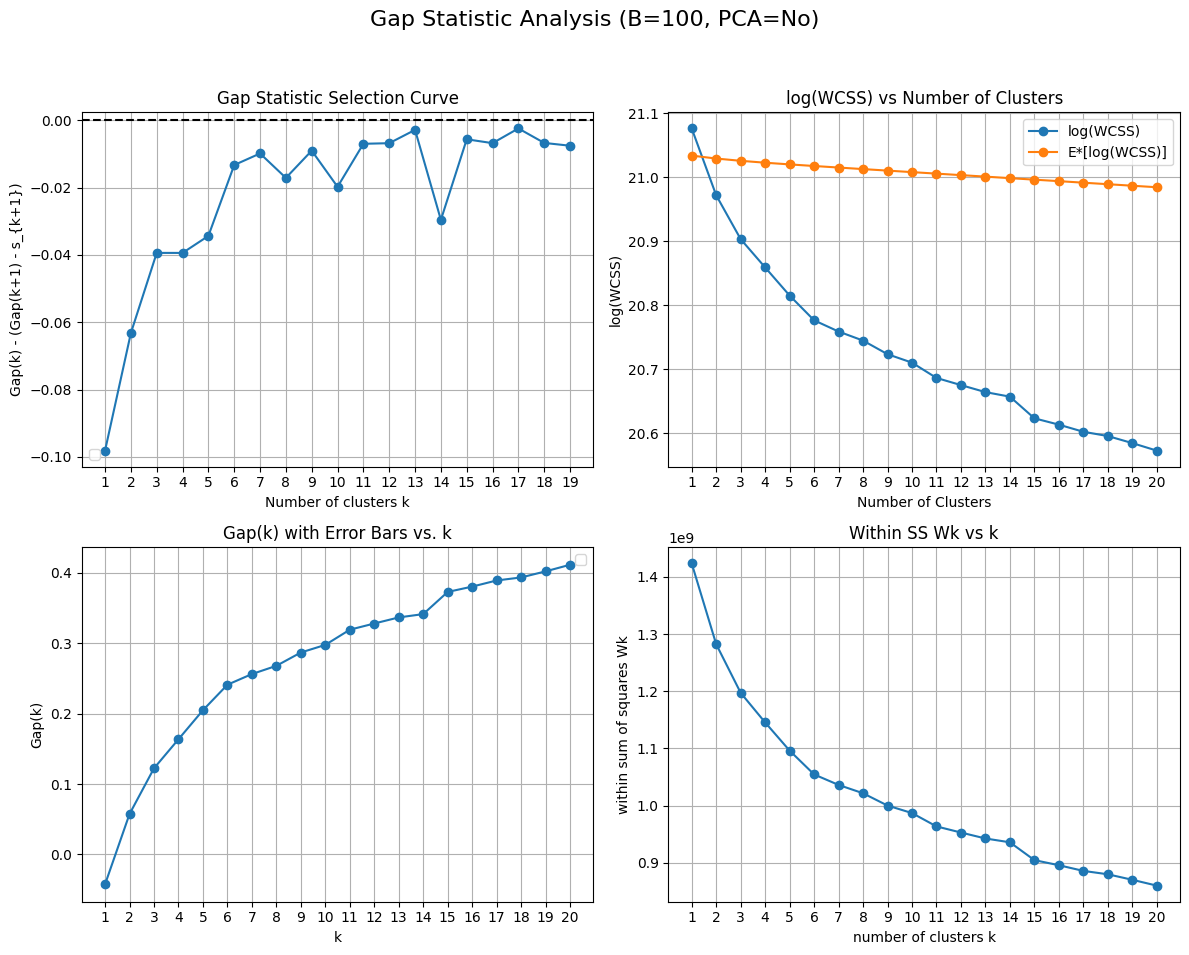

In [22]:
select_k_by_Gap_statistic(X, kmax=20, B=B, need_PCA=False, need_plot=True)

Answer the following questions:
- Before running the algorithm, what is your guess of the output $\hat{k}$? Is the selected $\hat{k}$ very different from what you expect?
- What differences do you see between outcomes using the two types of reference distributions? If their selected $\hat{k}$ are very different, could you provide some explanations?

a. Before running the algorithm on a single digit, I would expect it to be 1 since we're looking at imgaes of same digit class. PCA refernce distribution shows the optimal to be 6. Where as the Uniform reference distribution shows no optimal k found  suggesting $k \geq 20$. With the PCA reference distribution, the selected $k hat = 6$. This is a reasonable result, suggesting that beyond major stylistic differences, there are other subtle but consistent variations in the handwriting which resulted in distinctive clusters. With the uniform reference distribution, however no optimal k was found in the tested range which indicates this reference method is not suitable for this dataset.

b. The two distributions produce dramatically different results. The PCA reference distribution have a clear optimal k, the selection curve crosses above zero k = 6 and the gap values range from about 0.99 to 1.23. The Uniform reference distribution have no optimal k found in the range of 1-19, the selection curve remains below zero and the gap is much smaller ranging from 0 to 0.4. PCA reference distribution creates reference data that preserves the correlation structure of digit images. Since the reference is more realistic, its easier For the real data to show significant clustering structure compared to this Baseline leading to a k = 6. The uniform reference distribution generated a completely random noise. This is because the reference is so unstructured. The bars are kind of high for the real data to demonstrate meaningful clustering. The real digit data appears a little less clustered compared to the noise, making it difficult to detect significant structure. Basically, the uniform reference has too low of a baseline so that any real data will appear more structured than noise, so it will make it harder to detect meaningful clusters. The core of the issue is the quality of the "null reference" that each method creates. The goal is to compare our data's clustering against a realistic un-clustered equivalent. This leads to the crucial error: the $Gap(k) = E*[log(W*_k)] - log(W_k)$ value becomes artificially large and continues to increase with k. The algorithm sees that the real data is vastly more compact than the (unrealistic) reference data and incorrectly concludes that it is extremely clustered. Because the "benefit" of adding new clusters never drops off relative to this flawed, hyper-dispersed baseline, the condition $Gap(k) >= Gap(k+1) - s_{k+1}$ is never satisfied within the tested range.

### (c) We now apply the algorithm to the entire data set. But this time we will first transform the data by PCA.
For example, we first project the data to 10 principal component scores.

In [23]:
pca_complete_dataset = PCA(n_components=10)
pca_complete_dataset.fit(digits_data)
X = pca_complete_dataset.transform(digits_data)
print(X.shape)

(5000, 10)


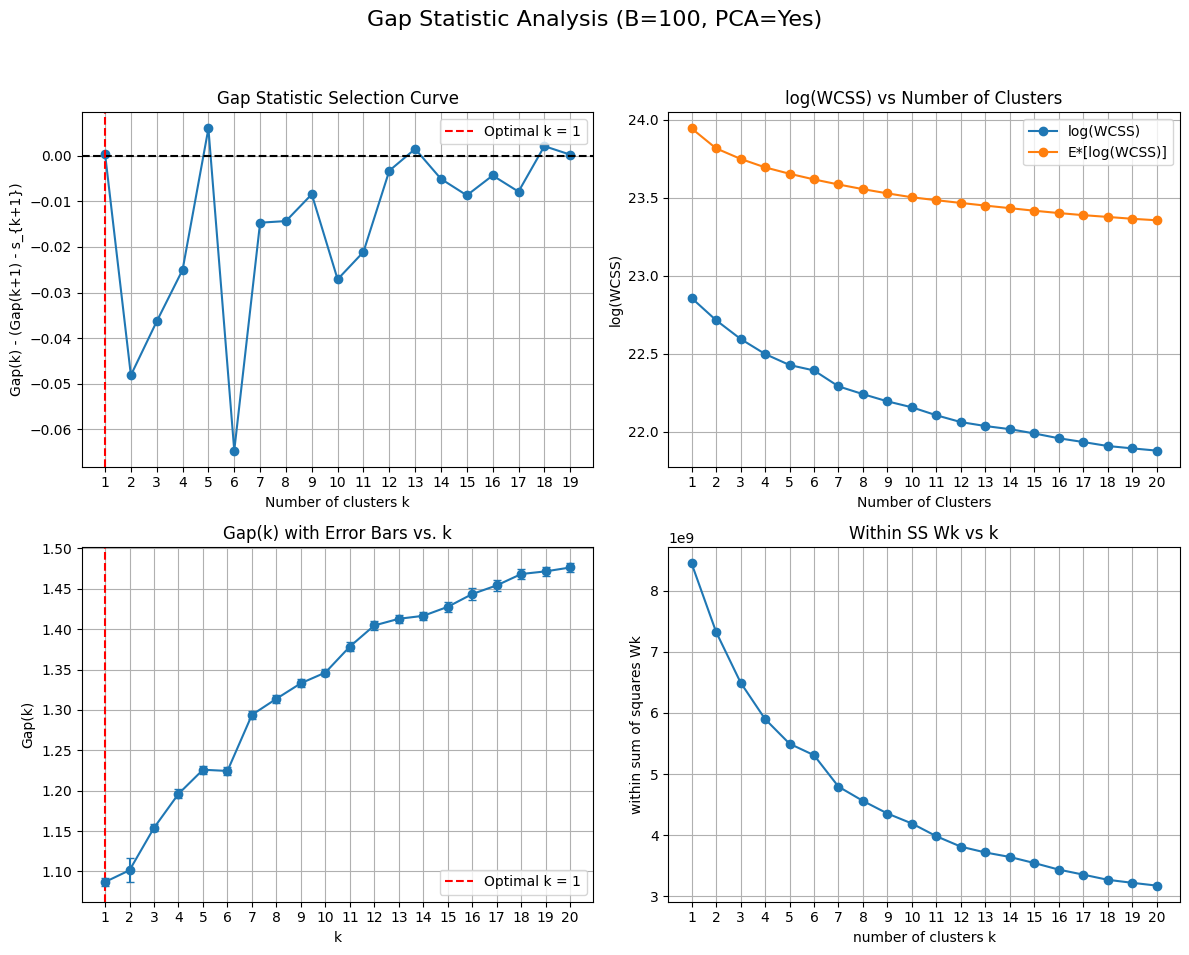

1

In [24]:
select_k_by_Gap_statistic(X, kmax=20, B=B, need_PCA=True, need_plot=True)

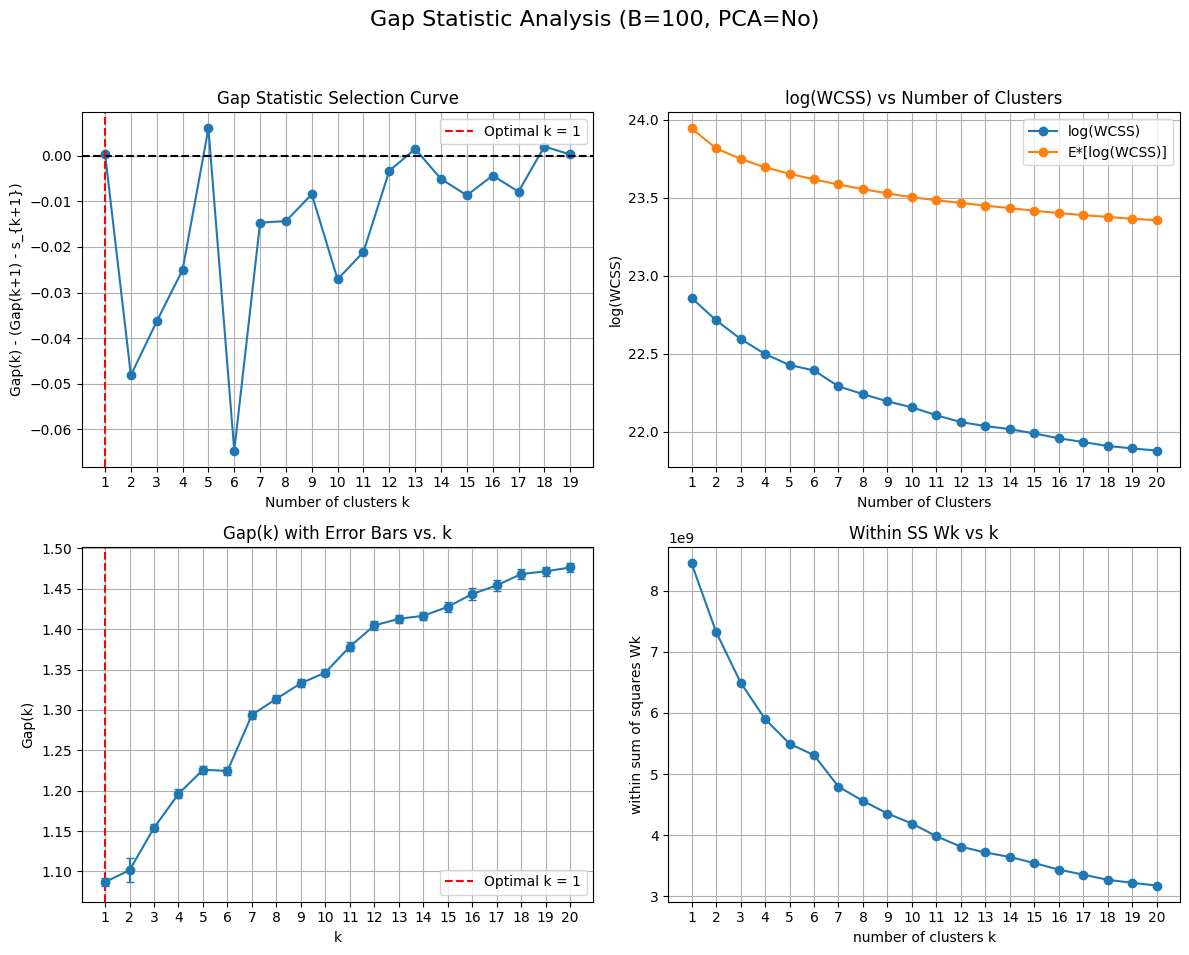

1

In [25]:
select_k_by_Gap_statistic(X, kmax=20, B=B, need_PCA=False, need_plot=True)

Note that now we obtain exactly the same results when using the two different reference distributions. Why?

The two reference distributions now give exactly the same results because the data has been pre processed with PCA projection before applying the Gap statistic. The PCA transformation creates new features (principal components) that are uncorrelated, meaning the principal axes of the data are now perfectly aligned with the coordinate axes. Since both reference distributions are now generating uniform random data in the same PCA transformed space, they become essentially equivalent. The correlation structure that previously distinguished the two approaches has already been factored out by the initial PCA transformation. Both approaches now compare the clustered PCA-projected data against uniform noise in the same PCA space, leading to identical Gap statistic calculations and the same optimal k = 1.

### (d) Explore how the PCA projection dimension $d$ affects the $\hat k$ selected by the Gap statistic.


For each PCA projection dimension $d$ in `[1, 5, 10, 15, 20, 25, 40, 60]`, apply the Gap statistic and find the selected $\hat{k}$. Make a plot of $\hat{k}$ against $d$.

PCA with 1 components. Selected k: 1
PCA with 5 components. Selected k: 1
PCA with 10 components. Selected k: 1
PCA with 15 components. Selected k: 1
PCA with 20 components. Selected k: 9
PCA with 25 components. Selected k: 14
PCA with 40 components. Selected k: 15
PCA with 60 components. Selected k: 12


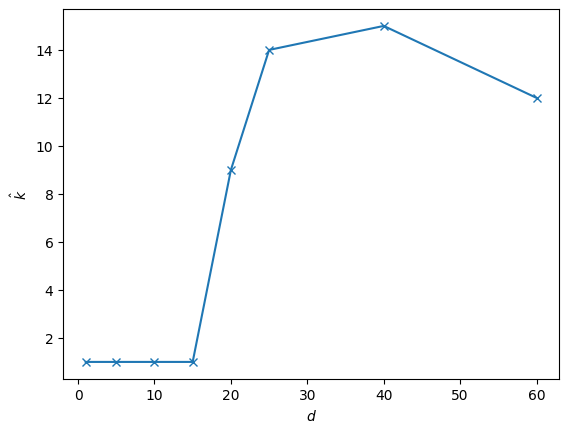

In [26]:
# example code. You may modify it.
d_list = [1, 5, 10, 15, 20, 25, 40, 60]
k_hat_list = []
for d in d_list:
    pca_complete_dataset = PCA(n_components=d)
    pca_complete_dataset.fit(digits_data)
    X = pca_complete_dataset.transform(digits_data[:1000, ]) # reduce the sample size for efficiency
    k_hat = select_k_by_Gap_statistic(X, kmax=20, B=50, need_PCA=False, need_plot=False)
    k_hat_list.append(k_hat)
    print(f"PCA with {d} components. Selected k: {k_hat}")

plt.plot(d_list, k_hat_list, 'x-')
plt.xlabel(r'$d$')
plt.ylabel(r'$\hat k$')
plt.show()

Intuitively explain why you see $\hat{k}$ change with $d$ in this way.

As d increases, the dimensions you're including increases. With more dimensions, you include more details and variation. Up to 15 dimensions, the gap statistic doesn't identify more than one cluster because there's not enough detail or variation for it to group more clusters. At lower dimensions, the clusters might be overlapping with each other when they aren't in higher dimensions. The overlap makes it harder to identify separate and distinct clusters. At these lower dimensions, the clusters overlap so much that the algorithm, which looks for the smallest k where $Gap(k) >= Gap(k+1) - s_k+1$, finds that the improvement from one to two clusters isn't statistically significant. It's a conservative method designed to choose the simplest model. Because the jump from one to two clusters was not deemed "worth it" by the statistical test, the algorithm halted immediately. It never had the chance to discover the much more intuitive and significant drop-off in improvement. (Such as k=5)

The dramatic jump occurs at d=20, where enough variation and detail are finally included to make the cluster structures detectable. The algorithm selects k=9, which is likely the point where it can distinguish most of the 10 digit classes from one another. As d increases from 20 to 40, k hat continues to rise to 15. This suggests the algorithm is now using the added dimensions to identify even finer structures, such as different ways of writing the same digit, and is classifying them as distinct sub-clusters.

After d=40, we see k hat decrease to 12. This happens because the additional dimensions included after d=40 do not contain useful, separable information. Instead, they represent noise. This added noise begins to obscure the clean boundaries between clusters that were visible at d=40. As a result, the noise makes some of the distinct handwriting variations less clear, causing the algorithm to merge them back into single clusters and thus report a smaller k hat.

### (e) Repeat (d) on the projection scores of your favorite digit. Again, make a plot of $\hat{k}$ against $d$.

Consider $d$ in `[2, 3, 5, 10, 15, 20, 25, 40]`.  Note that we use the PCA model *fitted on the entire data set*, but only use the projection scores of your favorite digit.

PCA with 2 components. Selected k: 3
PCA with 3 components. Selected k: 1
PCA with 5 components. Selected k: 4
PCA with 10 components. Selected k: 4
PCA with 15 components. Selected k: 7
PCA with 20 components. Selected k: 5
PCA with 25 components. Selected k: 6
PCA with 40 components. Selected k: 8


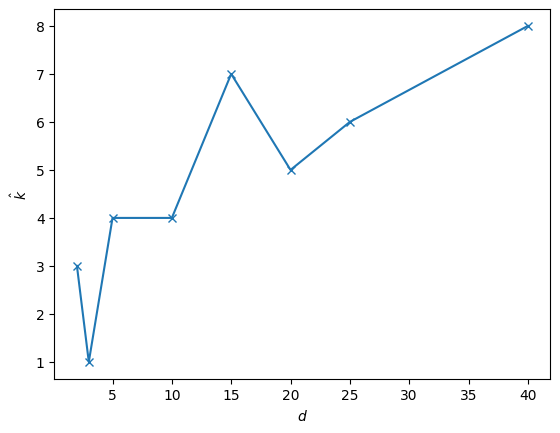

In [27]:
# example code. You may modify it.
d_list = [2, 3, 5, 10, 15, 20, 25, 40]
k_hat_list = []
for d in d_list:
    pca_complete_dataset = PCA(n_components=d)
    pca_complete_dataset.fit(digits_data)
    X = pca_complete_dataset.transform(digits_data[digits_target == num, ]) # reduce the sample size for efficiency
    k_hat = select_k_by_Gap_statistic(X, kmax=20, B=50, need_PCA=False, need_plot=False)
    k_hat_list.append(k_hat)
    print(f"PCA with {d} components. Selected k: {k_hat}")

plt.plot(d_list, k_hat_list, 'x-')
plt.xlabel(r'$d$')
plt.ylabel(r'$\hat k$')
plt.show()

Intuitively explain why you see $\hat{k}$ change with $d$ in this way.

The main reason for this erratic behavior is that the PCA was fitted on the entire dataset, so the dimensions were chosen to be optimal for separating all ten digits, not for finding sub-styles within just one digit. Therefore, some dimensions add useful style information, while others add irrelevant noise.

Overall, as d increases, k hat shows a general upward trend, but with notable dips. With more useful information, the gap statistic can detect/identify more clusters. At d=2, the first two principal components might have enough information or variation to identify/create 3 clusters. This might have been 3 different ways to write the number 4, or 3 styles of the number 4.

At d=3, more variation and information is introduced. However, this new dimension (PC3) was likely important for separating other digits (ie 8 from 9), not for describing styles of 4. For the digit 4 data, this dimension is effectively noise. The information therefore 'blurred' the distinction between the 3 clusters in d=2, resulting only in 1 cluster.

From d=3 to d=5,  the added dimensions provided enough useful variation  to identify 4 clusters where the 4s were written differently or had different groups of characteristics. Adding d's from 5 to 10 did not contribute much to add or combine clusters,  which still resulted in 4 clusters. This suggests these dimensions contained useful, but somewhat redundant, information for clustering this specific digit.

At d=15, there was enough information in the first 15 PCs to identify 7 different characteristics in the 4s to create 7 distinct clusters. At d=20, the k hat drops to 5. Again, this is likely because some of the dimensions added between 15 and 20 were irrelevant noise for the digit 4 (even if important for the full dataset), resulting in a combination or regrouping to less clusters.

After d=20, until d=40, the increase in d resulted in more clusters. The PCs in this range must have contained more variation and cluster structure to identify distinct writing styles or details in the 4s. The 4s could've been grouped by line thickness, angle, curviness, etc.

# <font color="blue"> Submission Instructions</font>

## if you choose to mainly work on Colab (recommended)
1. (If you haven't done so) File -> Save a copy in Drive.
2. Select Runtime -> Run All. This will run all the cells in order, and will take up to several minutes. <font color='red'>You will not get any grade if you don't follow this step strictly. This is to make sure that your code is executing the code without an error message.</font>
3. Make sure your outputs are generated correctly. Save again.
4. Share the file with
   - TA: mxsun@ucdavis.edu (Commenter)
5. You can choose from one of the following.
   - Select File -> Print, and your browser will allow you to save/print to pdf.
   - Select File -> Download -> Download .ipynb. Then follow Step 3 below. The pdf generate in the way below may be a little prettier as it shows the code blocks more distinctly.
6. Look at the PDF file and make sure all your solutions are there, displayed correctly.
7. Submit your PDF on Gradescope.

## if you choose to work locally
1. Click the Save button at the top of the Jupyter Notebook.
2. Select Cell -> Run All. This will run all the cells in order, and will take up to several minutes. <font color='red'>You will not get any grade if you don't follow this step strictly. This is to make sure that your code is executing the code without an error message.</font>
3. Once you've re-run everything, select File -> Download as -> PDF via LaTeX (You would need to install [pandoc](https://pandoc.org/installing.html) and latex. See the link for instructions.) **Or, a simpler way is to select File -> Download as -> html**. But because gradescope only accepts PDF, you can use the web browser (e.g. Chrome) feature of print to PDF. Make sure that when doing so, place the html under the same folder with all you figures.
4. Look at the PDF file and make sure all your solutions are there, displayed correctly.
5. Submit your PDF on Gradescope.
7. Upload your final ipynb file (with all your solutions and all the outputs) to your google drive, open it with google colab, and then share it with
   - TA: mxsun@ucdavis.edu (Commenter)